In [1]:
"""
Created on Fri Jun 20 08:21:50 2025

@author: kennyaskelson
"""

'\nCreated on Fri Jun 20 08:21:50 2025\n\n@author: kennyaskelson\n'

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_json('public_cases.json')

In [5]:
# Expand the 'input' column into its own DataFrame
input_expanded = pd.json_normalize(df['input'])

In [6]:
# Combine it back with the original expected_output column
df_cleaned = pd.concat([input_expanded, df['expected_output']], axis=1)

## Build ML model with Tensorflow

In [7]:
# Split features (X) and target (y)
X = df_cleaned[['trip_duration_days', 'miles_traveled', 'total_receipts_amount']]
y = df_cleaned[['expected_output']]

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

First lets get a baseline

In [9]:
# Create a DummyRegressor with the 'mean' strategy
dummy_regressor = DummyRegressor(strategy="mean")

In [10]:
# Train the model
dummy_regressor.fit(X_train, y_train)

DummyRegressor()

In [11]:
# Make predictions
y_pred = dummy_regressor.predict(X_test)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 200976.1867234799


Mean Squared Error: 200976.1867234799

In [13]:
model = tf.keras.Sequential([                     
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(64),
    tf.keras.layers.LeakyReLU(alpha=0.01),

    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(32),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    
    tf.keras.layers.Dense(1)  # Output layer
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error', metrics=['mae'])

2025-06-20 10:55:59.606135: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-06-20 10:55:59.606158: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-06-20 10:55:59.606164: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
I0000 00:00:1750442159.606175 2810480 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1750442159.606191 2810480 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split = 0.1)

Epoch 1/300


2025-06-20 10:55:59.965536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 2022300.6250 - mae: 1341.5400 - val_loss: 1742455.8750 - val_mae: 1231.8289
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2103890.7500 - mae: 1371.1233 - val_loss: 1725418.6250 - val_mae: 1225.9967
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2043684.3750 - mae: 1348.1279 - val_loss: 1709435.7500 - val_mae: 1220.9541
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2077353.1250 - mae: 1362.2690 - val_loss: 1688812.1250 - val_mae: 1214.5177
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1990190.6250 - mae: 1327.7379 - val_loss: 1672498.5000 - val_mae: 1209.2100
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1923960.5000 - mae: 1309.5231 - val_loss: 1622825.6250 - val_mae: 1192.1974
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1962023.0000 - mae: 1333.4417 - val_loss: 1549563.0000 - val_mae: 1166.4835
Epoch 8/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 

In [16]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 9971.9004 - mae: 77.0132 


[9586.9970703125, 76.63897705078125]

Final model mae: 71.7648 with 300 epochs
Well thats a lot better than the dummy regressor! 
But it tapered off quickly and bounced around 70-120 mae from epoch 50-300
So probably could do 150 epochs

In [17]:
#Let's tak a look at the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1) # Epochs start from 1

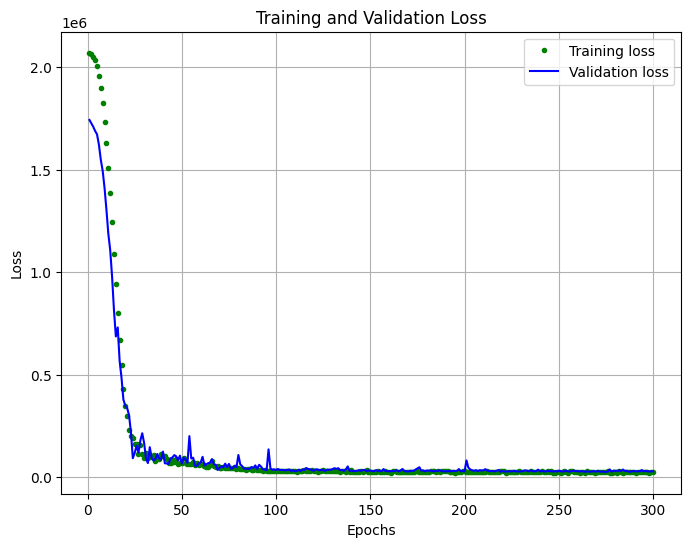

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Plot predictions.
test_predictions = model.predict(X_test).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Text(0, 0.5, 'Predictions (expenses)')

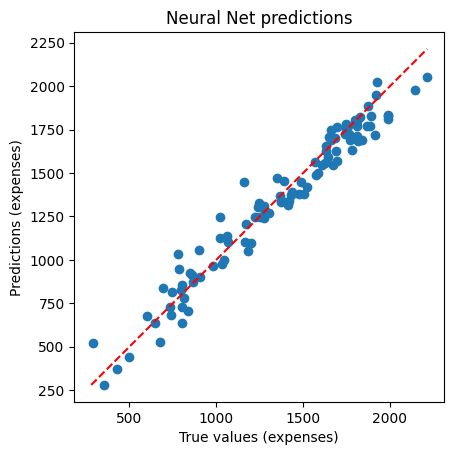

In [24]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions )
plt.title('Neural Net predictions')
## Make a 1-to-1 line
y_true = np.array(y_test)
y_pred = np.array(test_predictions)
min_val = np.min([y_true.min(), y_pred.min()])
max_val = np.max([y_true.max(), y_pred.max()])
# Plot 1-to-1 reference line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')

Looks pretty good!

model.save("reimbursement_model.keras")